<center><h1> Détection de fake news </h1></center>

Dans ce mini projet, on entraine un modèle de machine learning pour detecter des fausses informations **"Fake News"**.


<img src="fake news.jpg" style="height:400px" style="width:1000px"> 

## Source de données 
- Les données proviennent du site web Kaggle ===> [[Kaggle Data](https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset)]

## Chargement des librairies

In [53]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns 

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.utils import shuffle
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

import nltk
from nltk import tokenize
from wordcloud import WordCloud

import itertools
import string

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore')

## Chargement des données

In [7]:
fake = pd.read_csv("data/Fake.csv")
true = pd.read_csv("data/True.csv")

print(fake.shape)
print(true.shape)

## Netoyage et préparation de données

In [16]:
fake['target'] = 'fake'
true['target'] = 'true'


## Affichage des datasets

In [17]:
fake.head()

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",true
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",true
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",true
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",true
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",true


In [18]:
true.head()

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",true
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",true
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",true
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",true
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",true


- Nous allons concatener les deux datasets pour former le dataset contenant à la fois les **fake news** et les **true news**.

In [36]:
data = pd.concat([fake,true]).reset_index(drop =True)

In [37]:
data.shape

(44898, 5)

 On affiche les 5 premières lignes et les 5 dernières lignes du dataset.

In [38]:
data.head(5)

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake


In [39]:
data.tail(5)

,title,text,subject,date,target
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",true
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",true
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",true
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",true
44897,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",true


## Melange des données : Shuffle

*Pourquoi mélanger ?*

- En effet, il est très important de melanger les données. En mélangeant nos données, on s'assure que chaque point de données crée un changement **« indépendant »** sur le modèle, sans être biaisé par les points précedents.

In [40]:
data = shuffle(data)
data = data.reset_index(drop=True)

On regarde à nouveau les 5 premières lignes ...

In [41]:
data.head()

,title,text,subject,date,target
0,Giuliani’s Excuse For Forgetting 9/11 Is Just...,After a decade and a half of peppering nearly ...,News,"August 16, 2016",fake
1,Here’s A LONG List Of Bernie Sanders’ Accompl...,We ve already discussed Barack Obama s many ac...,News,"February 19, 2016",fake
2,Activists or Terrorists? How Media Controls an...,Randy Johnson 21st Century WireThe majority ...,US_News,"January 7, 2016",fake
3,Turkey must be in Syria's Idlib until threat o...,ISTANBUL (Reuters) - Turkey must be present in...,worldnews,"October 10, 2017",true
4,WATCH: Donald Trump Is An Imbecile Who Doesn’...,The more a Trump run for the White House as a ...,News,"May 12, 2016",fake


Quelques verifications 

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   target   44898 non-null  object
dtypes: object(5)
memory usage: 1.7+ MB


On enlève la colonne de la **date** et du **titre**; car ce sont pas des variables pertinentes.

In [43]:
data.drop(["date"],axis=1, inplace=True)
data.head()

,title,text,subject,target
0,Giuliani’s Excuse For Forgetting 9/11 Is Just...,After a decade and a half of peppering nearly ...,News,fake
1,Here’s A LONG List Of Bernie Sanders’ Accompl...,We ve already discussed Barack Obama s many ac...,News,fake
2,Activists or Terrorists? How Media Controls an...,Randy Johnson 21st Century WireThe majority ...,US_News,fake
3,Turkey must be in Syria's Idlib until threat o...,ISTANBUL (Reuters) - Turkey must be present in...,worldnews,true
4,WATCH: Donald Trump Is An Imbecile Who Doesn’...,The more a Trump run for the White House as a ...,News,fake


In [44]:
data.drop(["title"],axis=1,inplace=True)
data.head()

,text,subject,target
0,After a decade and a half of peppering nearly ...,News,fake
1,We ve already discussed Barack Obama s many ac...,News,fake
2,Randy Johnson 21st Century WireThe majority ...,US_News,fake
3,ISTANBUL (Reuters) - Turkey must be present in...,worldnews,true
4,The more a Trump run for the White House as a ...,News,fake


Conversion en minuscule des lettres

In [46]:
data['text'] = data['text'].apply(lambda x: x.lower())
data.head()

,text,subject,target
0,after a decade and a half of peppering nearly ...,News,fake
1,we ve already discussed barack obama s many ac...,News,fake
2,randy johnson 21st century wirethe majority ...,US_News,fake
3,istanbul (reuters) - turkey must be present in...,worldnews,true
4,the more a trump run for the white house as a ...,News,fake


Suppression des ponctuations

In [47]:
def sup_ponctuation(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

data['text'] = data['text'].apply(sup_ponctuation)

In [48]:
data.head()

,text,subject,target
0,after a decade and a half of peppering nearly ...,News,fake
1,we ve already discussed barack obama s many ac...,News,fake
2,randy johnson 21st century wirethe majority ...,US_News,fake
3,istanbul reuters turkey must be present in sy...,worldnews,true
4,the more a trump run for the white house as a ...,News,fake


In [54]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Adama\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [55]:
data.head()

,text,subject,target
0,decade half peppering nearly every political c...,News,fake
1,already discussed barack obama many accomplish...,News,fake
2,randy johnson 21st century wirethe majority ma...,US_News,fake
3,istanbul reuters turkey must present syria idl...,worldnews,true
4,trump run white house major party candidate si...,News,fake


## Exploration des données

Nombre d'articles par sujet 

subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


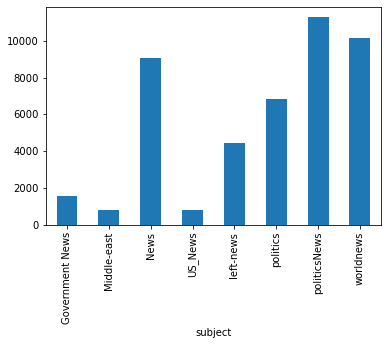

In [56]:
print(data.groupby(['subject'])['text'].count())
data.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

Nombre de faux articles et de vrais articles

target
fake    23481
true    21417
Name: text, dtype: int64


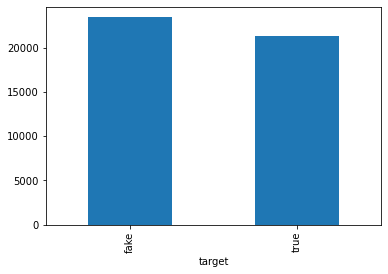

In [57]:
print(data.groupby(['target'])['text'].count())
data.groupby(['target'])['text'].count().plot(kind="bar")
plt.show()

Nuage de mots pour les fake news

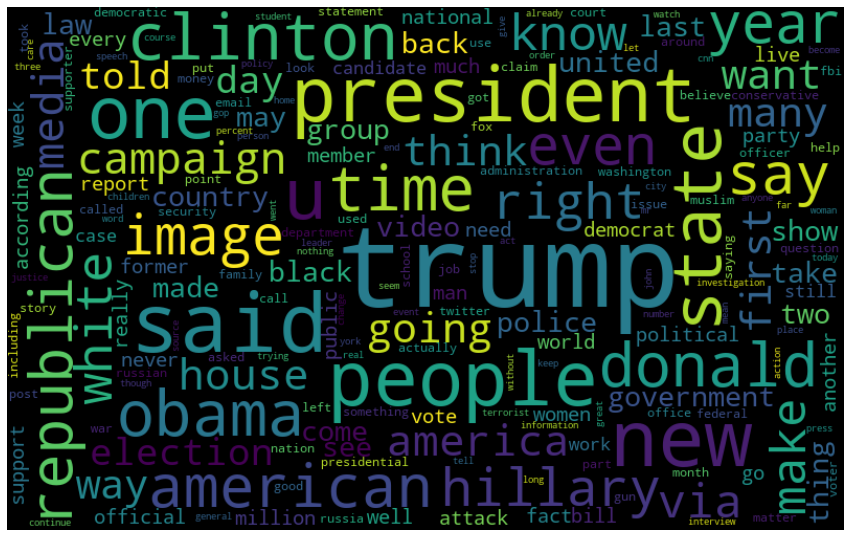

In [60]:
fake_data = data[data["target"] == "fake"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Nuage de mots pour les true news

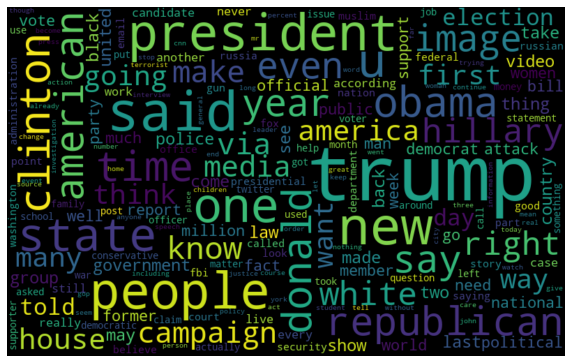

In [62]:
real_data = data[data["target"] == "true"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Mots le plus fréquent ?**

In [65]:
# Fonction de decompte
token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

**Mots le plus fréquents dans les fake news**

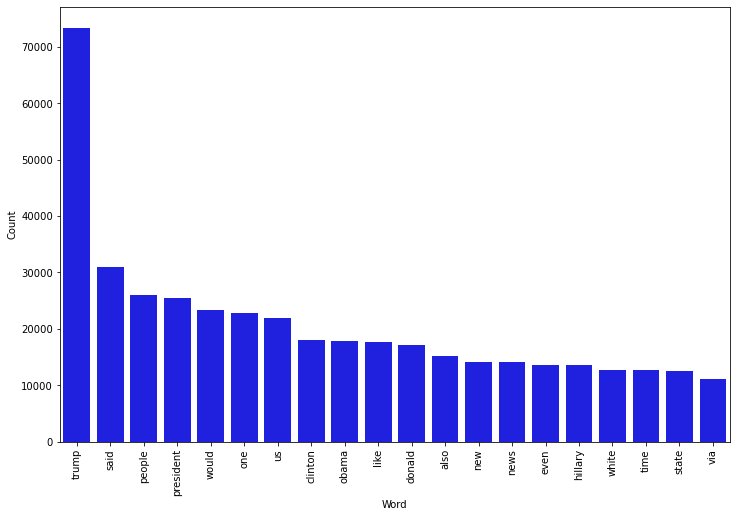

In [66]:
counter(data[data["target"] == "fake"], "text", 20)

- **On remarque le mots 'trump' est le plus fréquents dans les fakes news suivi de 'Said'.**

**Mots le plus fréquents dans les true news**

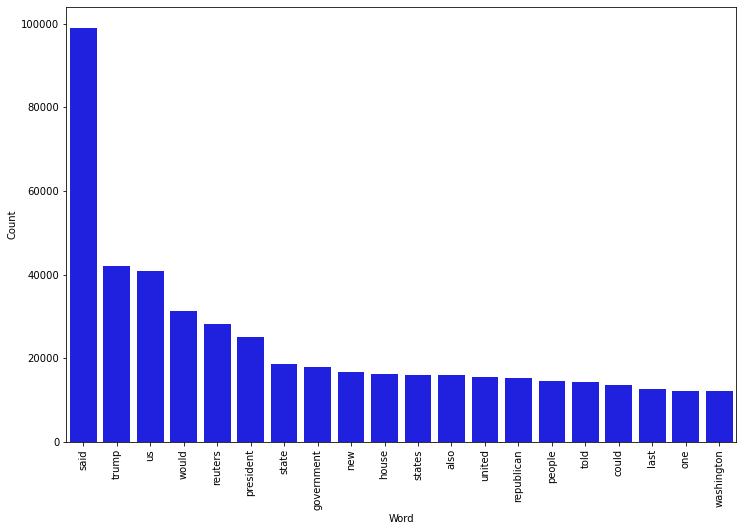

In [67]:
counter(data[data["target"] == "true"], "text", 20)

- **De meme, le mots le plus fréquents dans les true news est 'said' suivi de 'trump'**

# Modélisation

**Fonction d'affichage de la matrice de confusion**

In [69]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

**Division du dataset en dataset d'entrainement et de validation**

On choisit de prendre 20% des données pour la validation du modèle

In [70]:
X_train,X_test,y_train,y_test = train_test_split(data['text'], data.target, test_size=0.2, random_state=42)

In [71]:
X_train.head()

36335    reuters pennsylvania governor tom wolf wednesd...
12384    san francisco reuters german man come forward ...
24419    unsavory people donald trump appoints angrier ...
24740                                                     
27039    dearborn mich reuters syrianamericans friday h...
Name: text, dtype: object

In [72]:
y_train.head()

36335    true
12384    true
24419    fake
24740    fake
27039    true
Name: target, dtype: object

## Modèle : Decision Tree Classifier
On utilise le classificateur des arbres de décision pour faire notre classification

In [74]:
# Vectorisation 
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           splitter='best', 
                                           random_state=42))])
# Ajustement du modèle
model = pipe.fit(X_train, y_train)

# Précision
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 99.65%


- **On atteint une précision de 99.65%, le modèle fonctionne bien sur les données d'apprentissage.** 
- **Puisqu'on ne dispose pas de données de test, on ne peut affirmer son bon fonctionnement global..**

Confusion matrix, without normalization


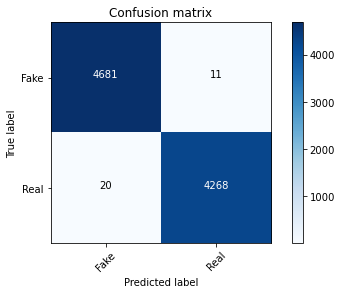

In [75]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

**Fin du mini projet .....**